<a href="https://colab.research.google.com/github/monokrrome/OIBSIP/blob/main/Prediction_of_Housing_Prices_using_Linear_Regression_OIBSIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[DATASET](https://www.kaggle.com/datasets/ashydv/housing-dataset)

Training set score: 0.6854429472843788
Test set score: 0.6494754192267803


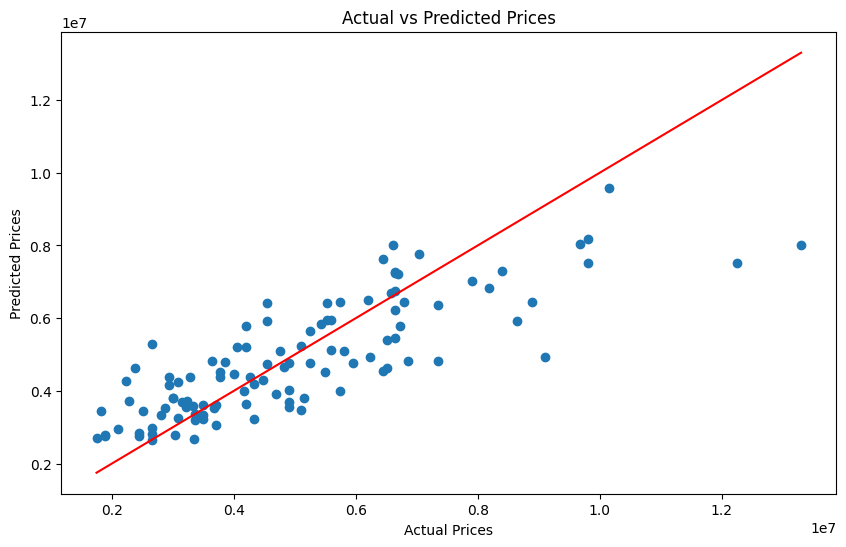

      Actual     Predicted
316  4060000  5.203692e+06
77   6650000  7.257004e+06
360  3710000  3.062829e+06
90   6440000  4.559592e+06
493  2800000  3.332932e+06


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('Housing.csv')

# Convert categorical variables into numerical ones
label_encoders = {}
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Define the features and the target variable
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the house prices on the testing set
y_pred = model.predict(X_test)

# Print the model's performance
print(f'Training set score: {model.score(X_train, y_train)}')
print(f'Test set score: {model.score(X_test, y_test)}')

# Scatter plot of Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing perfect prediction
plt.show()

# Optionally: Display predictions alongside actual values for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

### **Visualizations**

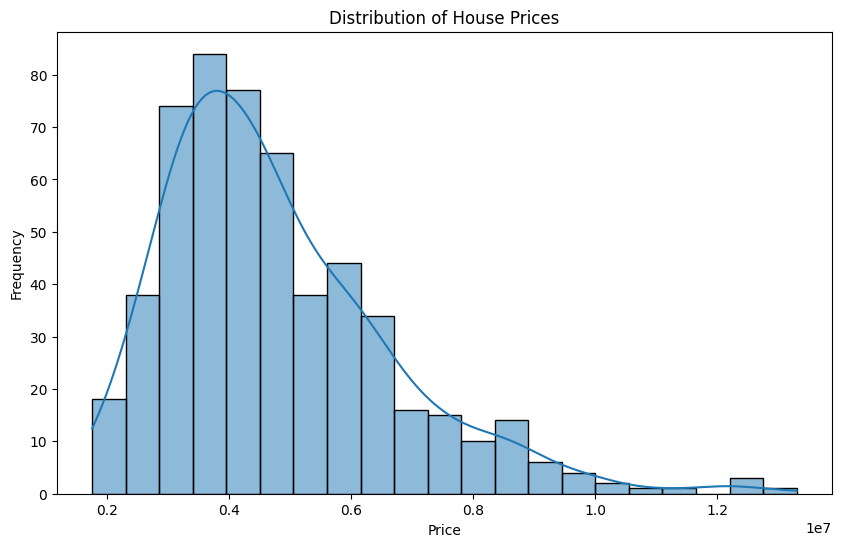

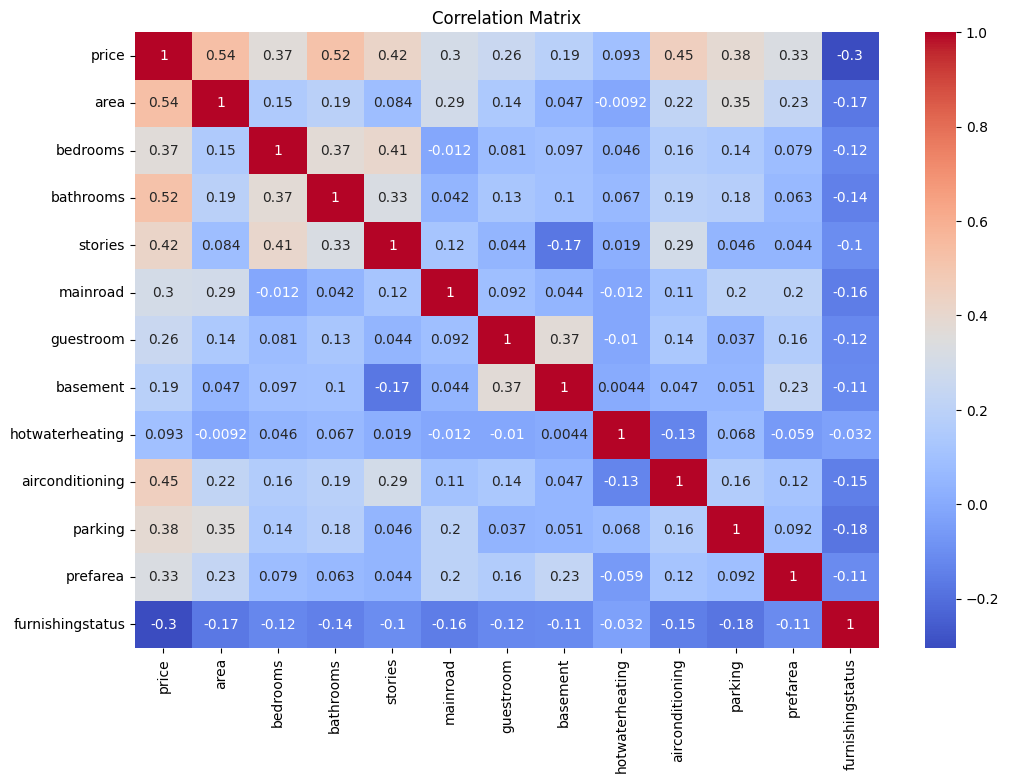

In [ ]:
# Histogram for the distribution of the 'price' feature
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()